## **Introduction** 📌  

### **1. Project Overview**  
The Labor Force Survey (LFS) is a nationwide quarterly survey conducted to collect key employment statistics, such as employment status, hours worked, and wages. Understanding labor market trends is crucial for policymakers, businesses, and economists to make informed decisions.  

This project aims to analyze the **Labor Force Survey 2016** dataset and build predictive models to extract meaningful insights about employment patterns.  

### **2. Objective and Research Questions**  
The primary objective of this study is to develop machine learning models to analyze labor market trends. We aim to answer the following key questions:  
- **(For Classification)**: Can we predict whether a person is employed based on demographic and socioeconomic factors?  
- **(For Regression)**: Can we estimate a worker's daily wage based on their education, industry, and work hours?  

### **3. Dataset Overview**  
The **2016 Labor Force Survey (LFS)** dataset contains demographic, educational, and employment-related attributes of individuals. Each row represents a surveyed person, with features such as:  
- **Demographics:** Age, sex, marital status, household size.  
- **Education:** Highest grade completed, technical training.  
- **Employment Status:** Current job status, industry type, hours worked.  
- **Income:** Basic daily pay, payment basis (hourly/daily/monthly).  

This dataset is publicly available from the **Philippine Statistics Authority (PSA)** and was collected through household surveys. The data provides valuable insights into employment trends and workforce characteristics.  

### **4. Machine Learning Approach**  
To gain insights from the data, we will apply the following steps:  
1. **Data Preprocessing & Cleaning:** Handle missing values, encode categorical features, and normalize numerical values.  
2. **Exploratory Data Analysis (EDA):** Identify trends, distributions, and relationships between features.  
3. **Model Training & Evaluation:** Compare different machine learning models for classification and/or regression.  
4. **Hyperparameter Tuning:** Optimize models to improve performance.  
5. **Insights & Conclusions:** Interpret results and discuss real-world implications.  

### **5. Expected Outcomes**  
By the end of this project, we expect to:  
✅ Identify key factors influencing employment and wages.  
✅ Build a predictive model with strong accuracy and interpretability.  
✅ Provide insights that can help policymakers address labor market challenges.  


## **Step 1: Data Cleaning 🧹**  

Before we can analyze and model the data, we need to ensure its quality by performing essential data cleaning steps. This involves handling missing values, correcting data types, dealing with duplicates, and addressing potential outliers.  

### **1.1 Loading the Dataset**  
First, we load the dataset and inspect its structure. This includes:  
✅ Checking the number of rows and columns.  
✅ Displaying the first few rows to understand the format.  
✅ Checking column names and data types.  



In [1]:
import pandas as pd

# Load the dataset
file_path = "/Users/m1/Downloads/MP FOR STINTSY/LFS PUF April 2016.CSV"  # Update with the correct path
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows
print(df.head())

# Display dataset shape (rows, columns)
print("Dataset Shape:", df.shape)

df.head()

   PUFREG  PUFPRV  PUFPRRCD  PUFHHNUM  PUFURB2K10  PUFPWGTFIN  PUFSVYMO  \
0       1      28      2800         1           2    405.2219         4   
1       1      28      2800         1           2    388.8280         4   
2       1      28      2800         1           2    406.1194         4   
3       1      28      2800         2           2    405.2219         4   
4       1      28      2800         2           2    384.3556         4   

   PUFSVYYR  PUFPSU  PUFRPL  ...  PUFC33_WEEKS  PUFC34_WYNOT  PUFC35_LTLOOKW  \
0      2016     217       1  ...                                               
1      2016     217       1  ...                                               
2      2016     217       1  ...                                               
3      2016     217       1  ...                                               
4      2016     217       1  ...                                               

   PUFC36_AVAIL  PUFC37_WILLING PUFC38_PREVJOB PUFC40_POCC PUFC41_WQ

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


### **1.2 Inspect Missing Values and Duplicates**  

In [2]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [3]:
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


### **1.2.1 Identify Outliers**  

In [4]:
print(df.describe())
df_original = df.copy()  # Store original dataset before cleaning



              PUFREG         PUFPRV       PUFPRRCD       PUFHHNUM  \
count  180862.000000  180862.000000  180862.000000  180862.000000   
mean        9.398801      45.825309    4585.055324   20528.231873   
std         4.667034      24.939767    2494.028733   11827.708144   
min         1.000000       1.000000     100.000000       1.000000   
25%         5.000000      24.000000    2402.000000   10256.250000   
50%        10.000000      46.000000    4600.000000   20406.000000   
75%        13.000000      71.000000    7100.000000   30962.000000   
max        17.000000      98.000000    9804.000000   40880.000000   

          PUFURB2K10     PUFPWGTFIN  PUFSVYMO  PUFSVYYR         PUFPSU  \
count  180862.000000  180862.000000  180862.0  180862.0  180862.000000   
mean        1.574947     568.527169       4.0    2016.0     386.270272   
std         0.494352     508.519331       0.0       0.0     440.160045   
min         1.000000      34.998400       4.0    2016.0       1.000000   
25%     

Detecting Outliers using IQR

### Columns to Check for Outliers

| Column Name      | Description                         | Why Check? |
|------------------|-------------------------------------|------------|
| **PUFC05_AGE**   | Age of person                      | 0-99 range might contain errors |
| **PUFPWGTFIN**   | Final survey weight                | Highly variable distribution |
| **PUFHHSIZE**    | Household size                     | Some values are very large (max = 23) |
| **PUFC25_PBASIC**| Basic pay per day (if available)   | Possible extreme wage values |
| **PUFC19_PHOURS**| Total hours worked last week       | Check for unrealistic work hours |


In [5]:

column_name = "PUFC05_AGE"

# Compute IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])


Number of outliers in PUFC05_AGE: 268


In [6]:
column_name = "PUFPWGTFIN"

# Compute IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])


Number of outliers in PUFPWGTFIN: 16430


In [7]:
column_name = "PUFHHSIZE"

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])


Number of outliers in PUFHHSIZE: 3539


In [8]:
import pandas as pd

column_name = "PUFC25_PBASIC"

# Convert column to numeric to avoid errors
df[column_name] = pd.to_numeric(df[column_name], errors="coerce")

# Compute IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1  

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])


Number of outliers in PUFC25_PBASIC: 2774


In [9]:
column_name = "PUFC19_PHOURS"

# Convert column to numeric
df[column_name] = pd.to_numeric(df[column_name], errors="coerce")

# Compute IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1  

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])


Number of outliers in PUFC19_PHOURS: 2467


### **1.2.2 Handling Said Outliers**  

### Comparison of Outlier Handling Options

| Method                  | Pros                                      | Cons                                           | Best for |
|-------------------------|------------------------------------------|-----------------------------------------------|----------|
| **Keep Outliers**       | Preserves all data, no loss of information | May lead to skewed results or poor model performance | Essential survey weights (**PUFPWGTFIN**), valid but extreme cases |
| **Cap (Winsorize)**     | Retains most data while limiting extreme influence | Can artificially reduce variability | Wages (**PUFC25_PBASIC**), household size (**PUFHHSIZE**), work hours (**PUFC19_PHOURS**) |
| **Remove Outliers (IQR Method)** | Ensures cleaner, less skewed data | Risk of removing valid extreme cases, loss of data | When extreme values are likely errors, e.g., unrealistic age (**PUFC05_AGE** < 0 or > 99) |


### Final Decision: Best Outlier Handling Approach for Each Column

| Column Name         | Handling Method    | Why? |
|---------------------|-------------------|------|
| **PUFC05_AGE** (Age) | **Keep only ages 18+** | The legal working age is 18, so we filter out younger values. |
| **PUFPWGTFIN** (Final Survey Weight) | **Keep as is** | Removing or modifying this weight would distort the survey's accuracy. |
| **PUFHHSIZE** (Household Size) | **Cap (Winsorize)** | Large families exist, but capping prevents extreme influence. |
| **PUFC25_PBASIC** (Basic Pay Per Day) | **Cap (Winsorize)** | Retains realistic wage data while limiting extreme values. |
| **PUFC19_PHOURS** (Total Hours Worked) | **Cap (Winsorize)** | Prevents unrealistic working hours from distorting the analysis. |


In [10]:
# Keep PUFPWGTFIN as is (survey weight)
df["PUFPWGTFIN"] = df["PUFPWGTFIN"]  # No modification

# Remove ages below 18 (legal working age)
df = df[df["PUFC05_AGE"] >= 18]

# Cap extreme values for other numerical columns
for column in ["PUFHHSIZE", "PUFC25_PBASIC", "PUFC19_PHOURS"]:
    lower_limit = df[column].quantile(0.01)
    upper_limit = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

# Print new dataset shape after cleaning
print("New dataset shape after applying outlier handling:", df.shape)


New dataset shape after applying outlier handling: (111715, 50)


# **Observations: Outlier Handling Impact**

## **1. Household Size (PUFHHSIZE)**
- **Before Cleaning:** Data is right-skewed, with a long tail extending beyond 15.
- **After Cleaning:** Distribution is more compact, with extreme values capped at a reasonable level.
- **Effect:** Prevents large household sizes from distorting statistical analysis.

## **2. Basic Pay Per Day (PUFC25_PBASIC)**
- **Before Cleaning:** Extreme outliers create a highly skewed distribution, making the histogram difficult to interpret.
- **After Cleaning:** Data is more normally distributed, with extreme wages capped.
- **Effect:** Ensures wage data remains realistic while preserving key trends.

## **3. Total Hours Worked (PUFC19_PHOURS)**
- **Before Cleaning:** A significant spike at lower values, but extreme values cause right skew.
- **After Cleaning:** More balanced distribution with extreme work hours capped.
- **Effect:** Prevents unrealistic work-hour values from biasing results.

## **Key Takeaways**
- Winsorizing (capping) effectively reduces the influence of extreme values while preserving overall data structure.
- Log-scaling improved visualization for highly skewed distributions (e.g., wages and work hours).
- The cleaned dataset is now better suited for analysis without excessive distortion from outliers.


In [11]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
Index: 111715 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           111715 non-null  int64  
 1   PUFPRV           111715 non-null  int64  
 2   PUFPRRCD         111715 non-null  int64  
 3   PUFHHNUM         111715 non-null  int64  
 4   PUFURB2K10       111715 non-null  int64  
 5   PUFPWGTFIN       111715 non-null  float64
 6   PUFSVYMO         111715 non-null  int64  
 7   PUFSVYYR         111715 non-null  int64  
 8   PUFPSU           111715 non-null  int64  
 9   PUFRPL           111715 non-null  int64  
 10  PUFHHSIZE        111715 non-null  int64  
 11  PUFC01_LNO       111715 non-null  int64  
 12  PUFC03_REL       111715 non-null  int64  
 13  PUFC04_SEX       111715 non-null  int64  
 14  PUFC05_AGE       111715 non-null  int64  
 15  PUFC06_MSTAT     111715 non-null  object 
 16  PUFC07_GRADE     111715 non-null  object 
 

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
count,111715.000000,111715.000000,111715.000000,111715.000000,111715.000000,111715.000000,111715.0,111715.0,111715.000000,111715.000000,...,111715,111715,111715,111715,111715,111715,111715,111715,111715,111715
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36,10,4,3,3,3,44,3,89,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,,1,,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109501,74970,110224,106000,106000,72756,84674,71135,40580,69204
mean,9.308723,46.042617,4606.864960,20295.618565,1.554124,572.407104,4.0,2016.0,387.651972,2.489898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.672374,24.965871,2496.621214,11821.069561,0.497064,515.442762,0.0,0.0,444.322645,1.118382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,100.000000,1.000000,1.000000,34.998400,4.0,2016.0,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,24.000000,2402.000000,10046.000000,1.000000,243.128200,4.0,2016.0,105.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10.000000,46.000000,4600.000000,20304.000000,2.000000,387.243600,4.0,2016.0,243.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13.000000,71.000000,7107.000000,30593.000000,2.000000,699.750500,4.0,2016.0,482.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for col in df.select_dtypes(include=["object", "category"]):
    print(f"{col}: {df[col].unique()}")


PUFC06_MSTAT: ['2' '1' '3' '4' '6' '5']
PUFC07_GRADE: ['350' '320' '622' '672' '240' '220' '614' '330' '280' '632' '900' '820'
 '589' '572' '250' '830' '634' '230' '810' '686' '581' '681' '552' '534'
 '840' '658' '000' '548' '310' '648' '210' '652' '662' '601' '642' '562'
 '685' '631' '684' '340' '584' '621' '410' '010' '420' '664' '676' '260'
 '521' '638' '554' '646' '689' '522' '654' '644' '532' '531' '514' '558'
 '501' '586' '542' '576' '544' '585' '564']
PUFC08_CURSCH: [' ' '2' '1']
PUFC09_GRADTECH: ['2' '1']
PUFC10_CONWR: ['5' '1' '2' '4' '3']
PUFC11_WORK: ['1' '2' ' ']
PUFC12_JOB: [' ' '2' '1']
PUFC14_PROCC: ['61' '92' '91' '52' '53' '13' '  ' '54' '93' '12' '71' '11' '83' '14'
 '51' '33' '44' '75' '42' '34' '96' '22' '62' '23' '72' '26' '41' '21'
 '43' '24' '74' '31' '82' '35' '94' '73' '25' '32' '81' '95' '02' '01'
 '03' '63']
PUFC16_PKB: ['01' '96' '47' '84' '49' '  ' '80' '41' '43' '45' '56' '46' '85' '53'
 '10' '92' '11' '74' '94' '55' '91' '86' '03' '38' '52' '72' '31' '64'

 Convert Blank Strings to NaN
Run this to replace empty spaces (' ') with NaN (missing values):

In [13]:
import numpy as np

# Replace all blank spaces in object (categorical) columns with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Verify missing values after replacement
print(df.isnull().sum()[df.isnull().sum() > 0])


PUFC08_CURSCH      88798
PUFC11_WORK         3552
PUFC12_JOB         71697
PUFC14_PROCC       42511
PUFC16_PKB         42511
PUFC17_NATEM       42511
PUFC18_PNWHRS      42511
PUFC19_PHOURS      42511
PUFC20_PWMORE      42511
PUFC21_PLADDW      42511
PUFC22_PFWRK       42511
PUFC23_PCLASS      42511
PUFC24_PBASIS      70813
PUFC25_PBASIC      76040
PUFC26_OJOB        42511
PUFC27_NJOBS      105865
PUFC28_THOURS      42511
PUFC29_WWM48H      94867
PUFC30_LOOKW       72756
PUFC31_FLWRK      109501
PUFC32_JOBSM      109501
PUFC33_WEEKS      109501
PUFC34_WYNOT       74970
PUFC35_LTLOOKW    110224
PUFC36_AVAIL      106000
PUFC37_WILLING    106000
PUFC38_PREVJOB     72756
PUFC40_POCC        84674
PUFC41_WQTR        15470
PUFC43_QKB         40580
PUFNEWEMPSTAT       3552
dtype: int64


Convert Numeric-Like Categorical Columns to Category Type
Some columns (e.g., marital status (PUFC06_MSTAT), job category (PUFC14_PROCC)) use numeric codes as categorical values. Convert them properly:

In [14]:
# List of categorical columns that have numeric-like values
categorical_cols = [
    "PUFC06_MSTAT", "PUFC07_GRADE", "PUFC08_CURSCH", "PUFC09_GRADTECH", 
    "PUFC10_CONWR", "PUFC11_WORK", "PUFC12_JOB", "PUFC14_PROCC", "PUFC16_PKB",
    "PUFC17_NATEM", "PUFC18_PNWHRS", "PUFC20_PWMORE", "PUFC21_PLADDW", 
    "PUFC22_PFWRK", "PUFC23_PCLASS", "PUFC24_PBASIS", "PUFC26_OJOB", 
    "PUFC27_NJOBS", "PUFC28_THOURS", "PUFC29_WWM48H", "PUFC30_LOOKW",
    "PUFC31_FLWRK", "PUFC32_JOBSM", "PUFC33_WEEKS", "PUFC34_WYNOT", 
    "PUFC35_LTLOOKW", "PUFC36_AVAIL", "PUFC37_WILLING", "PUFC38_PREVJOB",
    "PUFC40_POCC", "PUFC41_WQTR", "PUFC43_QKB", "PUFNEWEMPSTAT"
]

# Convert categorical columns to 'category' type
df[categorical_cols] = df[categorical_cols].astype("category")

# Verify conversion
print(df.dtypes[categorical_cols])


PUFC06_MSTAT       category
PUFC07_GRADE       category
PUFC08_CURSCH      category
PUFC09_GRADTECH    category
PUFC10_CONWR       category
PUFC11_WORK        category
PUFC12_JOB         category
PUFC14_PROCC       category
PUFC16_PKB         category
PUFC17_NATEM       category
PUFC18_PNWHRS      category
PUFC20_PWMORE      category
PUFC21_PLADDW      category
PUFC22_PFWRK       category
PUFC23_PCLASS      category
PUFC24_PBASIS      category
PUFC26_OJOB        category
PUFC27_NJOBS       category
PUFC28_THOURS      category
PUFC29_WWM48H      category
PUFC30_LOOKW       category
PUFC31_FLWRK       category
PUFC32_JOBSM       category
PUFC33_WEEKS       category
PUFC34_WYNOT       category
PUFC35_LTLOOKW     category
PUFC36_AVAIL       category
PUFC37_WILLING     category
PUFC38_PREVJOB     category
PUFC40_POCC        category
PUFC41_WQTR        category
PUFC43_QKB         category
PUFNEWEMPSTAT      category
dtype: object


Now, we need to decide how to fill missing values (formerly blank spaces):
Filling with mode ensures missing values don’t affect machine learning models.
If missing values contain meaningful info (e.g., "Not Applicable"), we can instead:

In [15]:
import numpy as np

# Replace blank spaces with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Ensure categorical columns have a 'Not Applicable' category before filling
for col in categorical_cols:
    if df[col].dtype.name == "category":
        df[col] = df[col].cat.add_categories("Not Applicable")  # Add category
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill missing with mode

# Verify that no missing values remain
print(df.isnull().sum()[df.isnull().sum() > 0])  # Should return an empty list



PUFC19_PHOURS    42511
PUFC25_PBASIC    76040
dtype: int64


Impute Missing Work Hours (PUFC19_PHOURS) Fill with median (robust to outliers)

In [16]:
df["PUFC19_PHOURS"].fillna(df["PUFC19_PHOURS"].median(), inplace=True)


/var/folders/b7/2x07ssr128b4yb0pnfywdfkh0000gn/T/ipykernel_27642/3442483176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PUFC19_PHOURS"].fillna(df["PUFC19_PHOURS"].median(), inplace=True)


Impute Missing Basic Pay (PUFC25_PBASIC)

In [17]:
df["PUFC25_PBASIC"].fillna(df["PUFC25_PBASIC"].median(), inplace=True)


/var/folders/b7/2x07ssr128b4yb0pnfywdfkh0000gn/T/ipykernel_27642/953951097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PUFC25_PBASIC"].fillna(df["PUFC25_PBASIC"].median(), inplace=True)


Encode Categorical Variables for ML (Optional)
If you’re preparing the data for machine learning, we must encode categorical variables:
(not sure yet which one we should use so just set it as label encoding for the time being)

 Label Encoding (Best for Tree-Based Models like Decision Trees, Random Forest)

In [18]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for inverse transform if needed

# Check encoded values
print(df.head())


   PUFREG  PUFPRV  PUFPRRCD  PUFHHNUM  PUFURB2K10  PUFPWGTFIN  PUFSVYMO  \
0       1      28      2800         1           2    405.2219         4   
1       1      28      2800         1           2    388.8280         4   
2       1      28      2800         1           2    406.1194         4   
3       1      28      2800         2           2    405.2219         4   
4       1      28      2800         2           2    384.3556         4   

   PUFSVYYR  PUFPSU  PUFRPL  ...  PUFC33_WEEKS  PUFC34_WYNOT  PUFC35_LTLOOKW  \
0      2016     217       1  ...             1             6               0   
1      2016     217       1  ...             1             6               0   
2      2016     217       1  ...             1             6               0   
3      2016     217       1  ...             1             6               0   
4      2016     217       1  ...             1             6               0   

   PUFC36_AVAIL  PUFC37_WILLING  PUFC38_PREVJOB  PUFC40_POCC  PUFC41

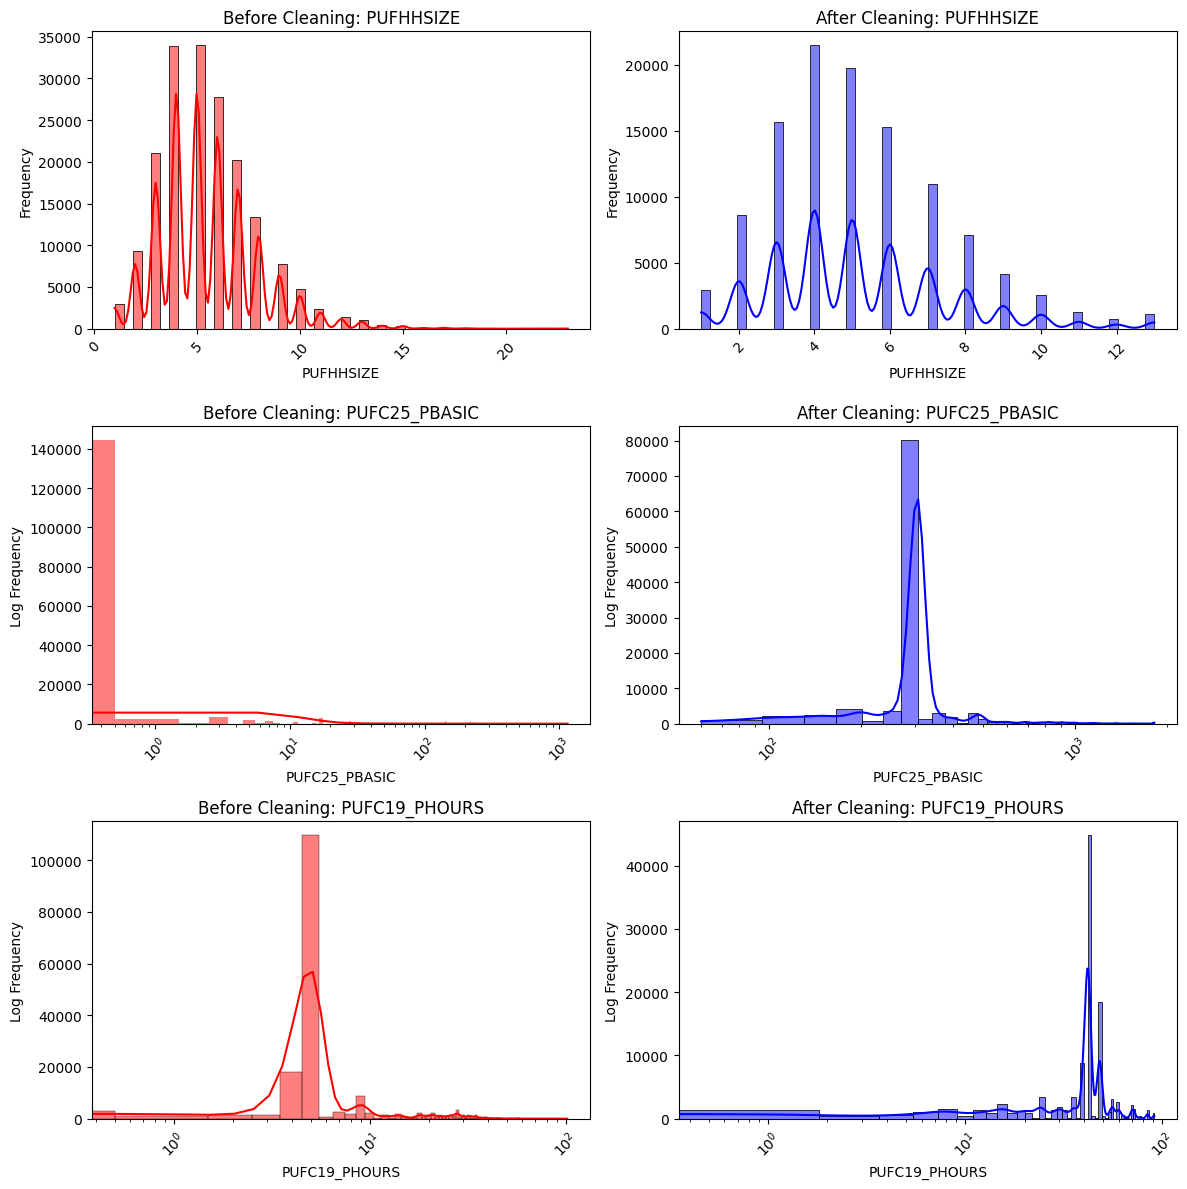

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to compare
columns = ["PUFHHSIZE", "PUFC25_PBASIC", "PUFC19_PHOURS"]

# Set up subplots
fig, axes = plt.subplots(len(columns), 2, figsize=(12, len(columns) * 4))

for i, column in enumerate(columns):
    # Before Cleaning
    sns.histplot(df_original[column], bins=50, kde=True, ax=axes[i, 0], color="red")
    axes[i, 0].set_title(f"Before Cleaning: {column}")
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for readability

    # After Cleaning
    sns.histplot(df[column], bins=50, kde=True, ax=axes[i, 1], color="blue")
    axes[i, 1].set_title(f"After Cleaning: {column}")
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].tick_params(axis="x", rotation=45)

    # Apply log scale for highly skewed data
    if column in ["PUFC25_PBASIC", "PUFC19_PHOURS"]:
        axes[i, 0].set_xscale("log")
        axes[i, 1].set_xscale("log")
        axes[i, 0].set_ylabel("Log Frequency")
        axes[i, 1].set_ylabel("Log Frequency")

plt.tight_layout()
plt.show()

